# A real-world case
In this tutorial we will be using data from a real-world case. The original data are protected by industrial policies and hence the ones shipped with dcgpy have a level of noise added that prevents their misuse.

This case is very informative as it shows how, in line with any other machine learning approach, also for symbolic regeression raw data have to be preprocessed with care as to obtain the maximum efficiency of the regression pipeline.

In [1]:
# Some necessary imports.
import dcgpy
import pygmo as pg
import numpy as np
# Sympy is nice to have for basic symbolic manipulation.
from sympy import init_printing
from sympy.parsing.sympy_parser import *
init_printing()
# Fundamental for plotting.
from matplotlib import pyplot as plt
%matplotlib inline

# 1 - The raw data

In [2]:
# We load our data from the dcgpy gym.
# In this particular case we use the problem luca1 which
# contains data from some real-world case. 
X, Y = dcgpy.generate_luca1()


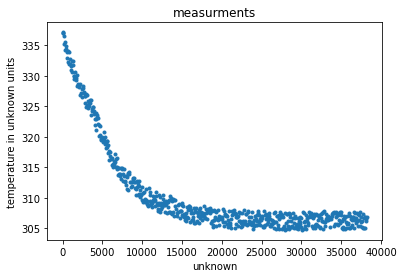

In [3]:
# And we plot them as to visualize the problem.
_ = plt.plot(X, Y, '.')
_ = plt.title('measurments')
_ = plt.xlabel('unknown')
_ = plt.ylabel('temperature in unknown units')



# 2 - Normalizing the data
While not strictly necessary, it is often highly beneficial to have the data normalized so that the numerics behind kernels remain stable. In this case, looking at the data, it is clear how the values on the abscissa may be too large for some kernel to compute without blowing up to infinity (think about exponentials of 40000!). Also the y-axis values could benefit to have the final plateau with a zero mean so that they could be represented asymtotically by a devreasing exponential.

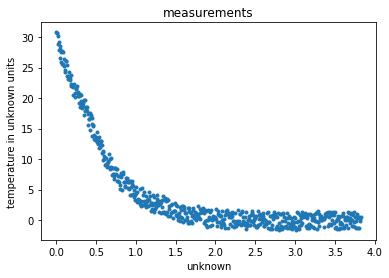

In [4]:
# We propose here this data normalization, others would also be valid. Try and experiment on the effect of not
## normalizing the data.
X = X / 10000
Y = Y - np.mean(Y[400:])
# And we plot them as to visualize the problem.
_ = plt.plot(X, Y, '.')
_ = plt.title('measurements')
_ = plt.xlabel('unknown')
_ = plt.ylabel('temperature in unknown units')



# 3 - The symbolic regression problem


In [5]:
# We define our kernel set, that is the mathematical operators we will
# want our final model to possibly contain. What to choose in here is left
# to the competence and knowledge of the user. A list of kernels shipped with dcgpy
# can be found on the online docs. The user can also define its own kernels (see the corresponding tutorial).
ss = dcgpy.kernel_set_double(["sum", "diff", "mul","exp","gaussian"])

In [6]:
# We instantiate the symbolic regression optimization problem (note: many important options are here not
# specified and thus set to their default values).
# Note that we allow for three constants in the final expression
udp = dcgpy.symbolic_regression(points = X, labels = Y, kernels=ss(), n_eph=3, rows =1, cols=16, levels_back=17)
print(udp)

	Data dimension (points): 1
	Data dimension (labels): 1
	Data size: 631
	Kernels: [sum, diff, mul, exp, gaussian]
	Loss: MSE



# 4 - The search algorithm

In [7]:
# We instantiate here the evolutionary strategy we want to use to search for models.
# In this case we use a single objective memetic algorithm.
uda  = dcgpy.mes4cgp(gen = 10000, max_mut = 4)

# 5 - The search

In [13]:
prob = pg.problem(udp)
algo = pg.algorithm(uda)
# Note that the screen output will happen on the terminal, not on your Jupyter notebook.
# It can be recovered afterwards from the log.
algo.set_verbosity(10)
pop = pg.population(prob, 4)

In [14]:
pop = algo.evolve(pop)

# 6 - Inspecting the solution

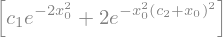

In [10]:
# Lets have a look to the symbolic representation of our model (using sympy)
parse_expr(udp.prettier(pop.champion_x))

In [11]:
# And lets see what our model actually predicts on the inputs
Y_pred = udp.predict(X, pop.champion_x)

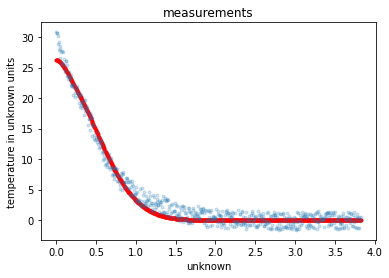

In [12]:
# Lets comapre to the data
_ = plt.plot(X, Y_pred, 'r.')
_ = plt.plot(X, Y, '.', alpha=0.2)
_ = plt.title('measurements')
_ = plt.xlabel('unknown')
_ = plt.ylabel('temperature in unknown units')